**********
**DATA  PREPARATION  AND        ANALYSIS OF DATASETS OF APP_STORE_GAMES**
******

In [60]:
## IMPORT FILES IN ORDER TO UPLOAD DESIRED FILE FOR ANALYSIS

from google.colab import files
up=files.upload()

Saving Copy of appstore_games(710).xlsx to Copy of appstore_games(710) (1).xlsx


In [0]:
## IMPORTING ALL MODULES REQUIRED IN THE PROJECT

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io



In [0]:
## READING THE DESIRED EXCEL FILE
## AND STORING IT IN df2 VARIABLE

df2=pd.read_excel(io.BytesIO(up['Copy of appstore_games(710).xlsx']))

In [0]:
## GETTING THE FIRST FIVE COLUMNS OF df2

df2.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,4.0
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2018-05-17,3.5
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11,2017-09-05,3.0
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3.5
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3.5


In [0]:
## GETTING LAST FIVE COLUMNS OF df2

df2.tail()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,0.0,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",2019-07-30,2019-07-30,NaN
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,0.0,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",2019-08-01,2019-08-01,NaN
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,0.0,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",2019-08-03,2019-08-03,NaN
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,0.0,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",2019-08-01,2019-08-01,NaN
17006,https://apps.apple.com/us/app/the-three-kingdo...,1475076711,The Three Kingdoms :Bomb,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,0.0,NaN,The protagonist uses the method of placing a b...,ming bo tang,4+,"EN, ZH",22952960.0,Games,"Games, Strategy, Puzzle",2019-08-02,2019-08-02,NaN


In [0]:
## SHAPE OF df2 DATAFRAME 
## IN (ROWS ,COLUMNS ) FORMAT

df2.shape


(17007, 18)

In [0]:
## GETTING SUM OF ALL
## NULL VALUES IN
## ALL COLUMNS OF
## df2 DATAFRAME

df2.isnull().sum()

URL                                 0
ID                                  0
Name                                1
Subtitle                        11750
Icon URL                            0
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                        17
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
Average User Rating              9446
dtype: int64

In [0]:
## REMOVING THE COLUMNS
## WHICH ARE NOT ESSENTIAL
## IN df2 FILE

a=["Subtitle","URL","ID","Icon URL","In-app Purchases"]
for i in range(len(a)):
  df2=df2.drop([a[i]],axis=1)

In [0]:
## NEW DATAFRAME AFTER
## REMOVING ALL ABOVE COLUMNS

df2.head(3)

,Name,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,Sudoku,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,4.0
1,Reversi,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2018-05-17,3.5
2,Morocco,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11,2017-09-05,3.0


In [0]:
df2.isnull().sum()

Name                               1
User Rating Count               9446
Price                             24
Description                       17
Developer                          0
Age Rating                         0
Languages                         60
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Average User Rating             9446
dtype: int64

In [0]:
## FILLING NULL VALUES
## OF PARTICULAR COLUMNS
## WITH MEDIAN OF THAT PARTICULAR
## COLUMNS

df2["Average User Rating"].fillna(df2["Average User Rating"].median(),inplace=True)
df2["User Rating Count"].fillna(df2["User Rating Count"].median(),inplace=True)

In [0]:
df2.isnull().sum()

Name                             1
User Rating Count                0
Price                           24
Description                     17
Developer                        0
Age Rating                       0
Languages                       60
Size                             1
Primary Genre                    0
Genres                           0
Original Release Date            0
Current Version Release Date     0
Average User Rating              0
dtype: int64

In [0]:
## DROPPING ALL THE NULL VALUES


df2=df2.dropna(axis=0)

In [0]:
df2.isnull().sum()

Name                            0
User Rating Count               0
Price                           0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Average User Rating             0
dtype: int64

In [0]:
## FRESH DATAFRAME
## IS SHOWN BELOW

df2.head()

,Name,User Rating Count,Price,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,Sudoku,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,4.0
1,Reversi,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2018-05-17,3.5
2,Morocco,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-07-11,2017-09-05,3.0
3,Sudoku (Free),190394.0,0.00,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3.5
4,Senet Deluxe,28.0,2.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3.5


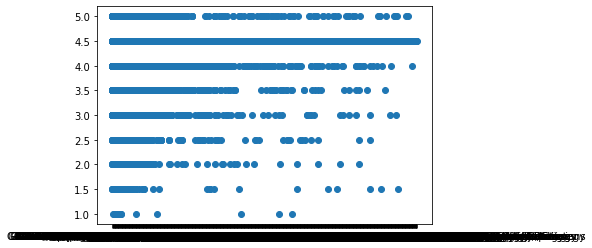

In [0]:
## ANALYZING BETWEEN 
## AVERAGE USER RATING
## AND GENRES COLUMNS
## USING MATPLOTLIB

plt.scatter(df2["Genres"],df2["Average User Rating"])

In [0]:
## GETTING ALL UNIQUE 
## OBJECT

df2["Primary Genre"].unique()

array(['Games', 'Entertainment', 'Finance', 'Sports', 'Reference',
       'Medical', 'Education', 'Utilities', 'Book', 'Travel',
       'Productivity', 'Lifestyle', 'Business', 'News',
       'Social Networking', 'Health & Fitness', 'Music', 'Stickers',
       'Food & Drink', 'Shopping', 'Navigation'], dtype=object)

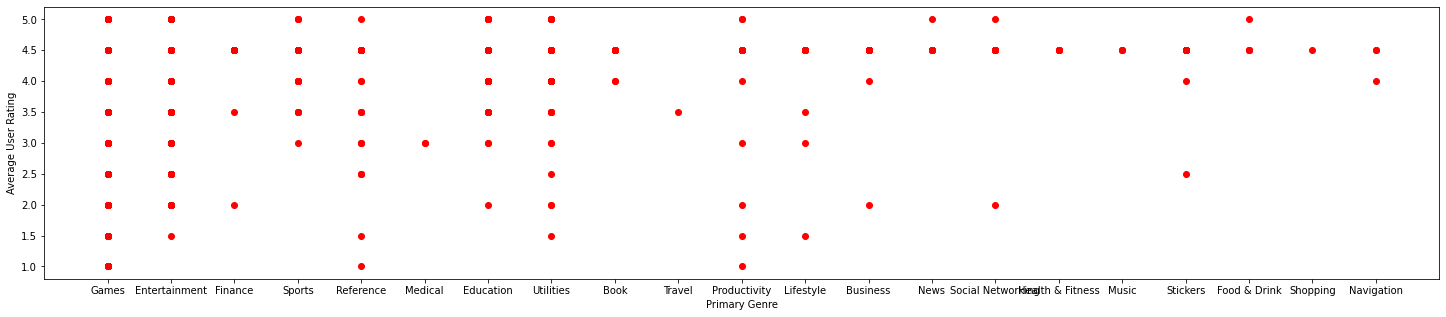

In [0]:
plt.figure(figsize=(25,5))
plt.xlabel("Primary Genre")
plt.ylabel("Average User Rating")
plt.scatter(df2["Primary Genre"],df2["Average User Rating"],color="red")

In [59]:
## GETTING THE TOTAL
## COUNTS OF DIFFERENT
## OBJECTS IN df2["Primary Genre"]

l=[]
for i in df2["Primary Genre"].unique():
  count=0
  for j in df2["Primary Genre"]:
    if i==j:
      count+=1
  print(i," ",count)


Games   16189
Entertainment   196
Finance   18
Sports   59
Reference   32
Medical   2
Education   221
Utilities   77
Book   9
Travel   1
Productivity   15
Lifestyle   10
Business   15
News   7
Social Networking   9
Health & Fitness   5
Music   3
Stickers   29
Food & Drink   4
Shopping   1
Navigation   3


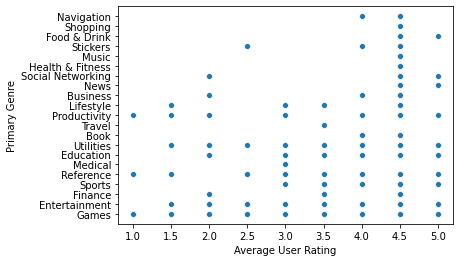

In [0]:
## ANALYZING THROUGH SEABORN

sns.scatterplot(df2["Average User Rating"],df2["Primary Genre"])

([<matplotlib.patches.Wedge at 0x7ff6537ec748>,
 [Text(-3.2708298423411417, 0.43780377162676887, 'Games'),
  Text(3.2133277099511375, -0.7513488061214842, 'Entertainment'),
  Text(3.2406597206870607, -0.6229964483979527, 'Finance'),
  Text(3.2492424266577244, -0.5765619245210577, 'Sports'),
  Text(3.25852773760604, -0.5215333002331317, 'Reference'),
  Text(3.261757975455799, -0.5009340371251372, 'Medical'),
  Text(3.279711166932864, -0.3653692125725369, 'Education'),
  Text(3.294906865399747, -0.18327233381395408, 'Utilities'),
  Text(3.297415018148083, -0.13059172290569826, 'Book'),
  Text(3.29765201321755, -0.1244636481959346, 'Travel'),
  Text(3.298007516509503, -0.11465784337245644, 'Productivity'),
  Text(3.2985046159499385, -0.09933427684818344, 'Lifestyle'),
  Text(3.2989305177289303, -0.08400856621042987, 'Business'),
  Text(3.299246409257413, -0.07052042967869104, 'News'),
  Text(3.2994415104700954, -0.06071012260586019, 'Social Networking'),
  Text(3.2995882948467736, -0.0521

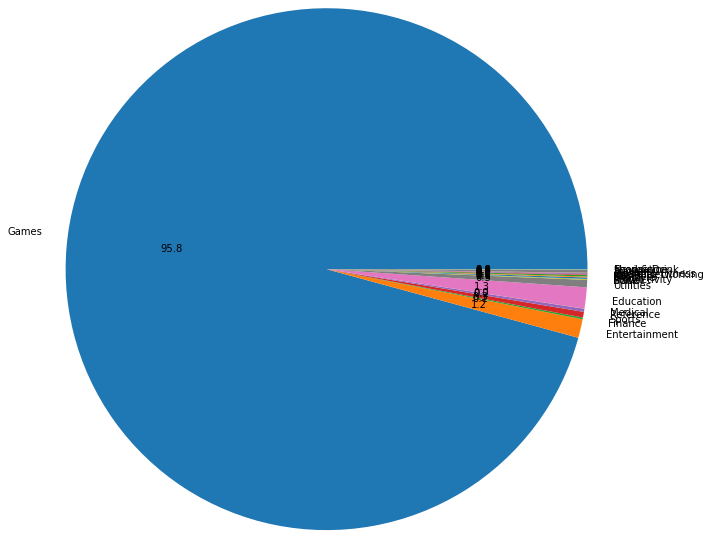

In [0]:
plt.pie(l,labels=df2["Primary Genre"].unique(),autopct="%0.1f",startangle=0,radius=4)

<BarContainer object of 16905 artists>

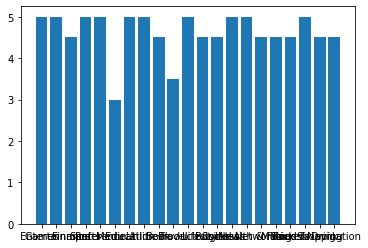

In [0]:
plt.bar(df2["Primary Genre"],df2["Average User Rating"])

**FROM THE ABOVE ANALYSIS BETWEEN GENRE AND USER RATING
WE FOUND THAT GAMES CATEGORY IN GENRE IS QUITE SIGNIFICANT**






******
**IDENTIFYING TREND OF USER RATING BASED ON PRICING**
******

In [56]:
print(df2["Average User Rating"].mean())
print(df2["Average User Rating"].mode())
df2["Average User Rating"].median()

4.304643596569062
0    4.5
dtype: float64


4.5

In [51]:
## OBTAINING USER RATING 
## OF DIFFERENT GENRE
## OF APPS

s={}
s1=set(df2["Primary Genre"])
l=list(s1)
start=0

for jj in range(len(df2["Primary Genre"])):
  ll=list(df2["Primary Genre"])

  count=0
  p=0
  for i in df2["Average User Rating"]:
    for j in ll:
      if j==l[start]:
        count+=i
        p+=1
        ll.pop(0)
        break
  print(l[start]," ",count/p)
  start+=1
s1


Utilities   4.304144186873777
Health & Fitness   4.2514666666666665
Sports   4.304079696394687
Navigation   4.289570713721359
Book   4.283199334627114
Medical   3.3675213675213675
Food & Drink   4.286468491492367
Social Networking   4.3032459797498515
Business   4.302614261785116
News   4.294629898403484
Shopping   4.25765742642026
Travel   3.6588447653429603
Lifestyle   4.299688016149752
Reference   4.290027537372148
Education   4.3043941726874335
Entertainment   4.304527966854099
Finance   4.29341260253068
Music   4.265837749694252
Stickers   4.303058304518898
Games   4.304643596569062
Productivity   4.299799037817429


IndexError: ignored

In [7]:
df2.head(2)

,Name,User Rating Count,Price,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,Sudoku,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,4.0
1,Reversi,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-07-11,2018-05-17,3.5


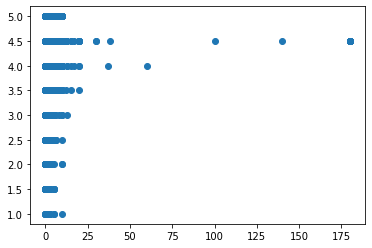

In [46]:


plt.scatter(df2["Price"],df2["Average User Rating"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f4cd2fc1160>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4cd2fc1b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4cd2fcb630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4cd2fcb2b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4cd2fc1470>,
  <matplotlib.lines.Line2D at 0x7f4cd2fc17f0>]}

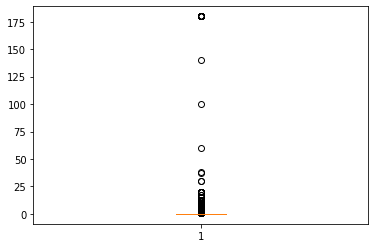

In [14]:
plt.boxplot(df2["Price"])

In [22]:
len(df2[df2["Price"]>100])

31

In [23]:
len(df2[df2["Price"]>50])

33

In [39]:
len(df2[df2["Price"]==0])

14149

In [37]:
df2["Price"].mode()

0    0.0
dtype: float64

**INFERENCES** *

**FROM THE ABOVE DATASETS OF APP STORE RATING WE OBSERVE THAT :--**
1. THE GENRE "GAMES" IS MOST USED APP WITH USED PERCENTAGE OF 95% .
2. THE GENRES HAVING HIGHER "USER RATING" ARE-
 UTILITIES , SPORTS , GAMES , ENTERTAINMENT , EDUCATION etc. AND LESS RATED GENRE OF GAMES ARE MEDICAL AND TRAVEL.
3.THE APPS WHICH ARE FREE(NO COST) ARE WIDELY USED .
4.APPS WHICH ARE COSTLY(ABOVE 25) HAVE GOOD "AVERAGE USER RATING".
 

 




